In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [269]:
hour = pd.read_csv('hour.csv')
hour.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [270]:
hour.shape

(17379, 17)

In [271]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [272]:
hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [273]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [274]:
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [275]:
hour['day'] = pd.to_datetime(hour['dteday']).dt.day

In [276]:
corr_matrix = hour.corr(numeric_only=True).abs()
corr_matrix['cnt'].sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
hum           0.322911
instant       0.278379
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
day           0.004312
Name: cnt, dtype: float64

Text(0.5, 1.0, 'count vs month')

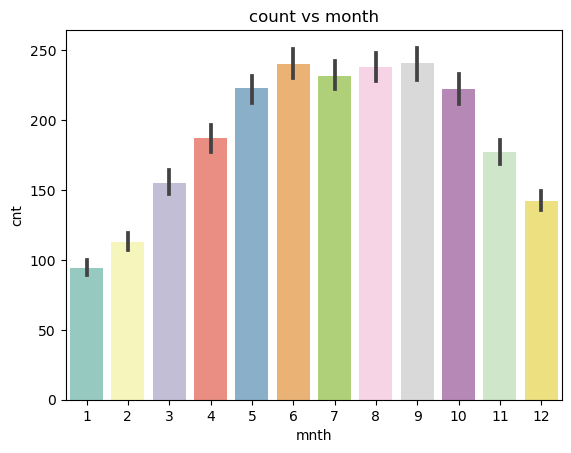

In [173]:
sns.barplot(x="mnth", y="cnt", data=hour, palette = 'Set3')
plt.title('count vs month')

Text(0.5, 1.0, 'count vs day')

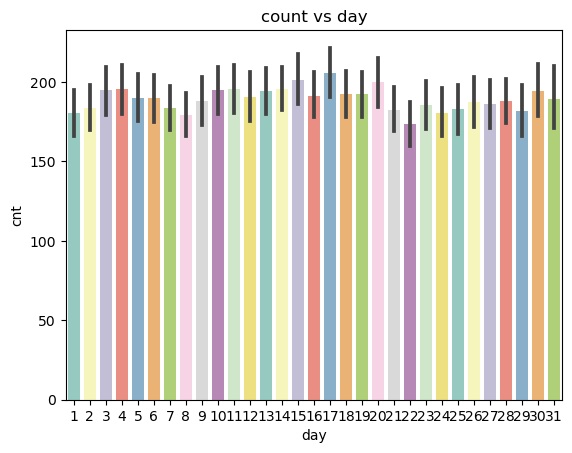

In [174]:
sns.barplot(x="day", y="cnt", data=hour, palette = 'Set3')
plt.title('count vs day')

تو ماه های گرم تعداد دوچرخه سوارها بیشتر میشه اما تو ماه خیلی گرم کم میشه

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

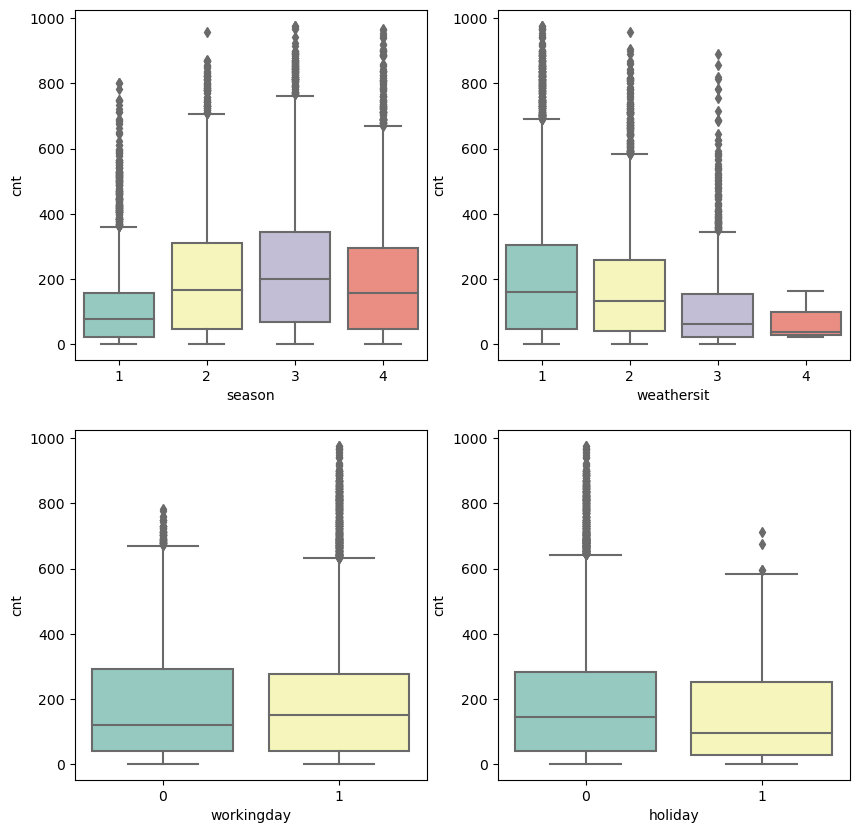

In [175]:
figure, axes = plt.subplots(2,2)
figure.set_size_inches(10, 10)
# boxplot of all catagorical features 
# season , weather , workingday , holiday
plt.subplot(2,2,1)
sns.boxplot(x='season',y='cnt',data=hour,palette = 'Set3')
plt.subplot(2,2,2)
sns.boxplot(x='weathersit',y='cnt',data=hour,palette = 'Set3')
plt.subplot(2,2,3)
sns.boxplot(x='workingday',y='cnt',data=hour,palette = 'Set3')
plt.subplot(2,2,4)
sns.boxplot(x='holiday',y='cnt',data=hour,palette = 'Set3')

<AxesSubplot:>

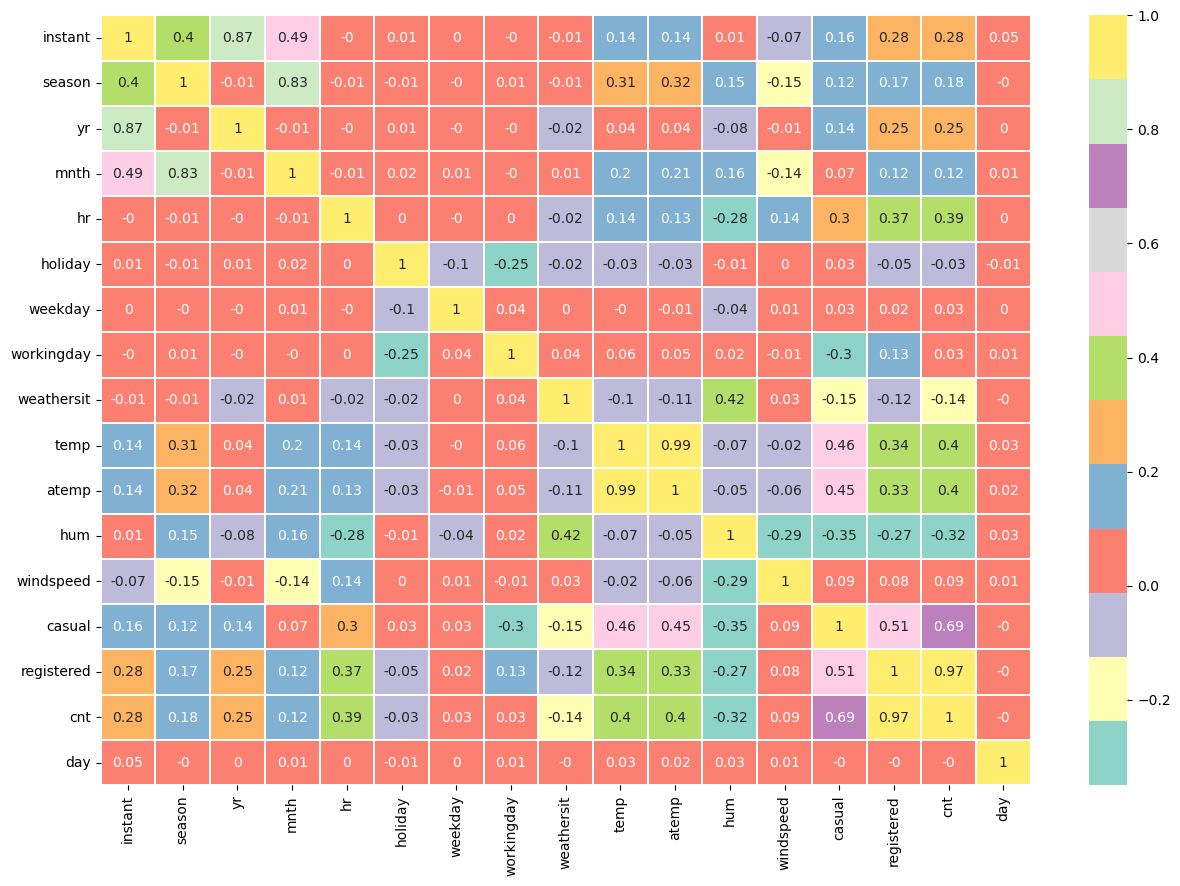

In [176]:
plt.figure(figsize = (15,10))
tc =round(hour.corr(numeric_only=True),2)
sns.heatmap(tc, annot = True, cmap = 'Set3', linecolor = 'white', linewidths=0.1)

با این جدول ارتباط فیچر هایی که خیلی زیاد هست رو میبینیم و میتونیم یکیشون رو حذف کنیم مثل دماها

<AxesSubplot:xlabel='yr', ylabel='cnt'>

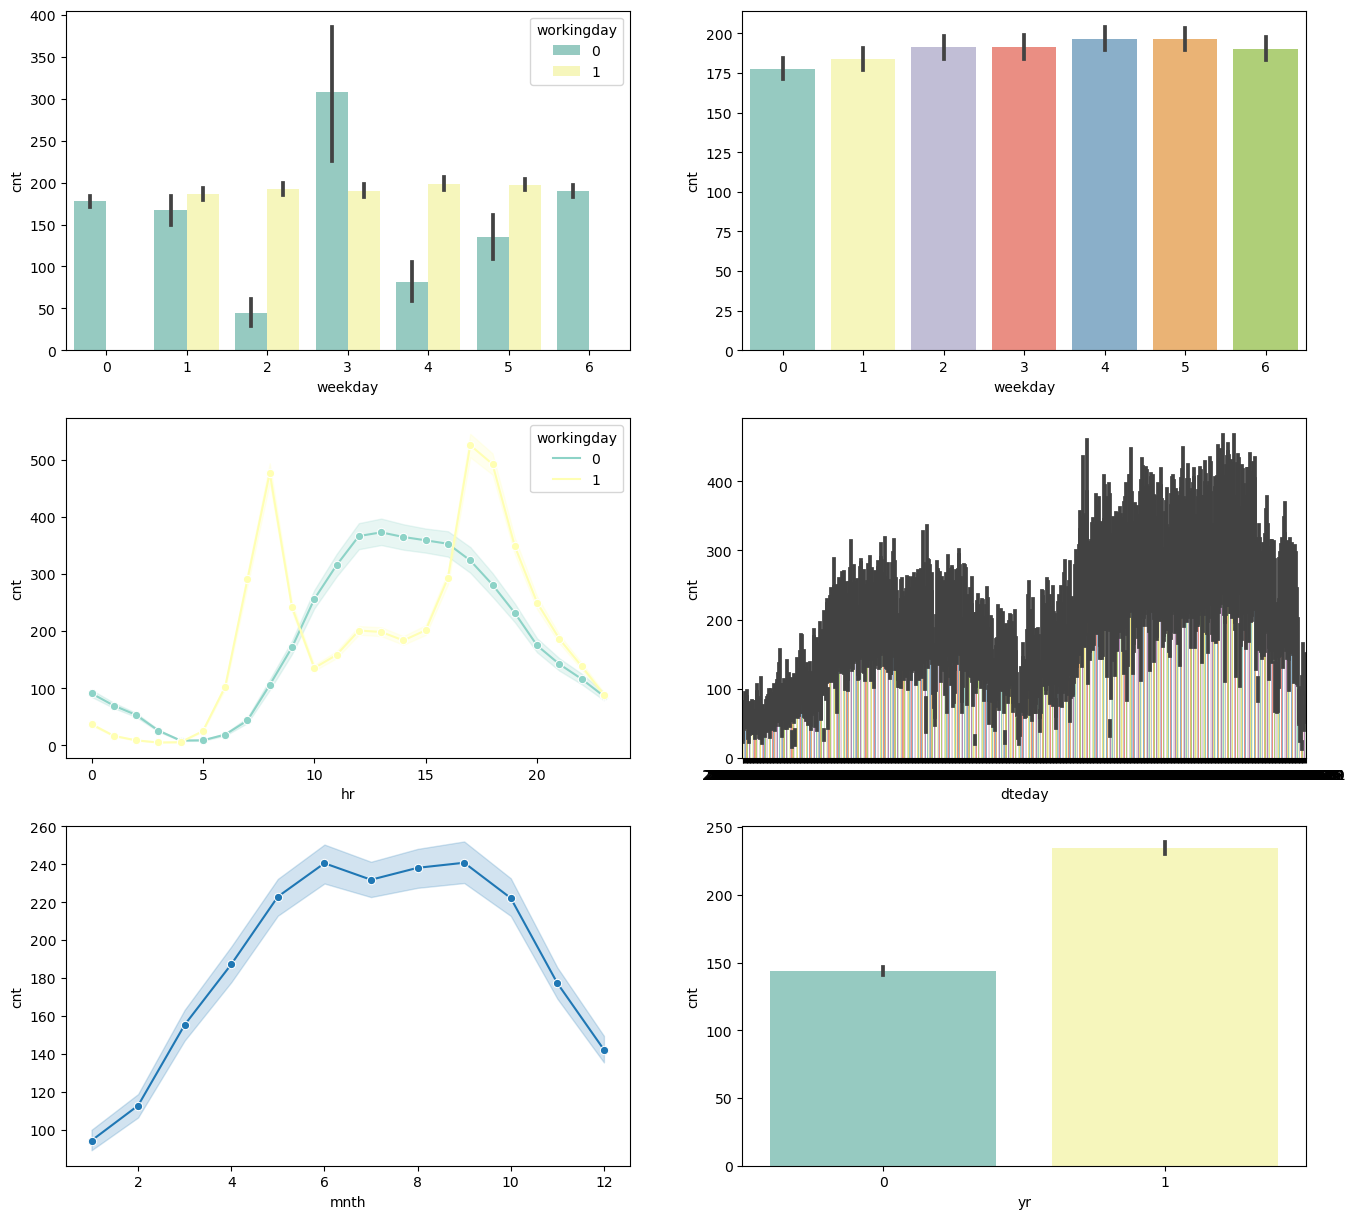

In [178]:
fig, axs = plt.subplots(3,2)
fig.set_size_inches(16,15)
sns.barplot(data=hour, x="weekday", y="cnt", hue='workingday', ax=axs[0][0],palette = 'Set3')
sns.barplot(data=hour, x="weekday", y="cnt", ax=axs[0][1],palette = 'Set3')
sns.lineplot(data=hour, x="hr", y="cnt", hue='workingday', marker='o', markers=True, dashes=False, ax=axs[1][0],palette = 'Set3')
sns.barplot(data=hour, x="dteday", y="cnt", ax=axs[1][1],palette = 'Set3')
sns.lineplot(data=hour, x="mnth", y="cnt", marker='o', markers=True, dashes=False, ax=axs[2][0])
sns.barplot(data=hour, x="yr", y="cnt", ax=axs[2][1],palette = 'Set3')

<AxesSubplot:xlabel='temp', ylabel='cnt'>

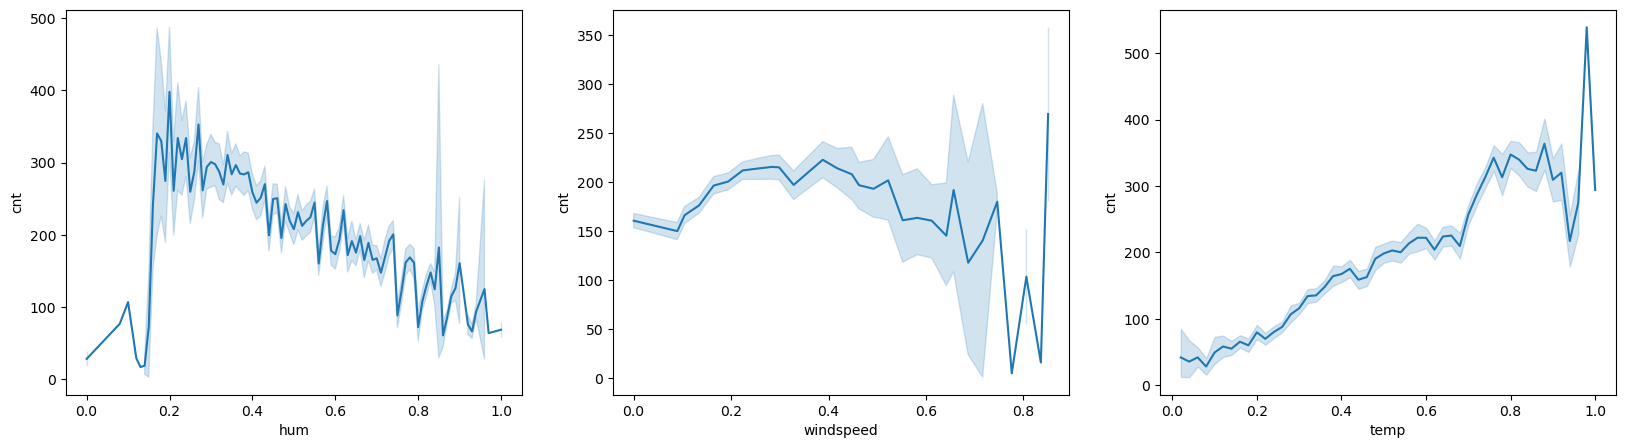

In [179]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches(20,5)
sns.lineplot(data=hour, x="hum", y="cnt", ax=axs[0])
sns.lineplot(data=hour, x="windspeed", y="cnt", ax=axs[1])
sns.lineplot(data=hour, x="temp", y="cnt", ax=axs[2])

In [180]:
hour[hour['weathersit'] == 4]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
585,586,2011-01-26,1,0,1,16,0,3,1,4,0.22,0.1970,0.93,0.3284,1,35,36,26
8854,8855,2012-01-09,1,1,1,18,0,1,1,4,0.20,0.2273,0.86,0.0896,6,158,164,9
9123,9124,2012-01-21,1,1,1,1,0,6,0,4,0.14,0.1364,0.86,0.1940,1,22,23,21


In [253]:
hour.drop(hour.index[(hour["weathersit"] == 4)],axis=0,inplace=True)

Text(0.5, 1.0, 'hours vs count')

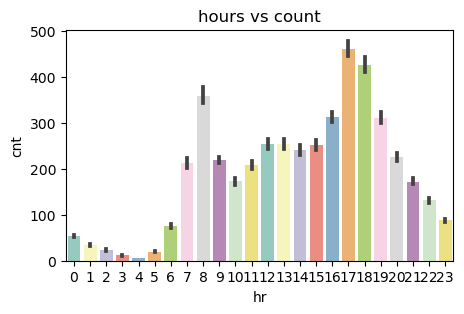

In [183]:
plt.figure(figsize=(5,3))
sns.barplot(x='hr',y='cnt',data=hour , palette = 'Set3')
plt.title('hours vs count')

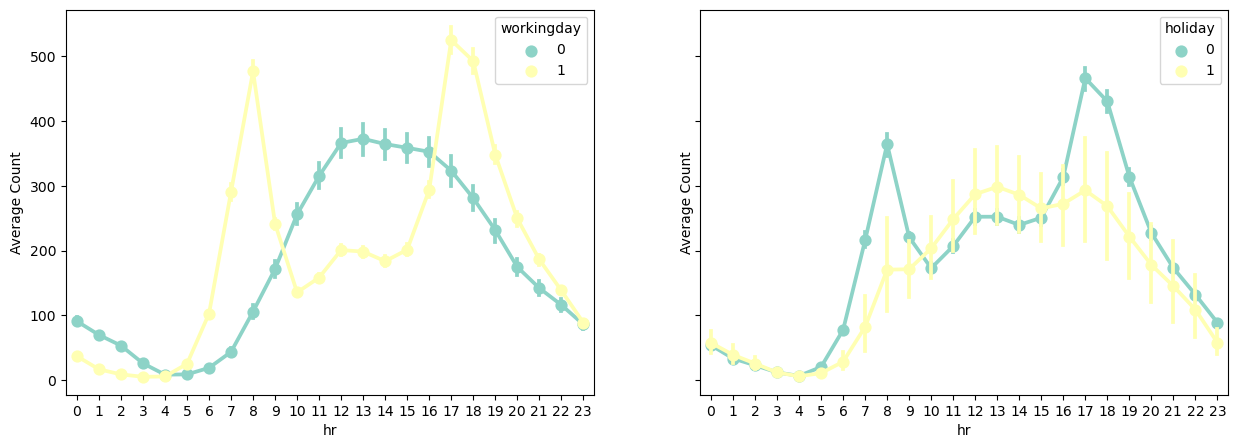

In [184]:
fig, axes = plt.subplots(ncols = 2, figsize = (15,5), sharey = True)
sns.pointplot(x = 'hr', y = 'cnt', data = hour, estimator = np.average, hue = 'workingday', ax = axes[0], palette = 'Set3')
sns.pointplot(x = 'hr', y = 'cnt', data = hour, estimator = np.average, hue = 'holiday', ax = axes[1], palette = 'Set3')
ax = [0,1]
for i in ax:
    axes[i].set(ylabel='Average Count')

در روزهای کاری حدود ساعت 7 و 17 تقاضای زیادی وجود دارد. تقاضای کمتری در ساعت 0 تا 5 و 10 تا 14 ساعت وجود دارد.
در روزهای غیر کاری در ساعات 10 تا 14 تقاضای زیادی وجود دارد. در حدود ساعت 7 تقاضای کمتری وجود دارد.

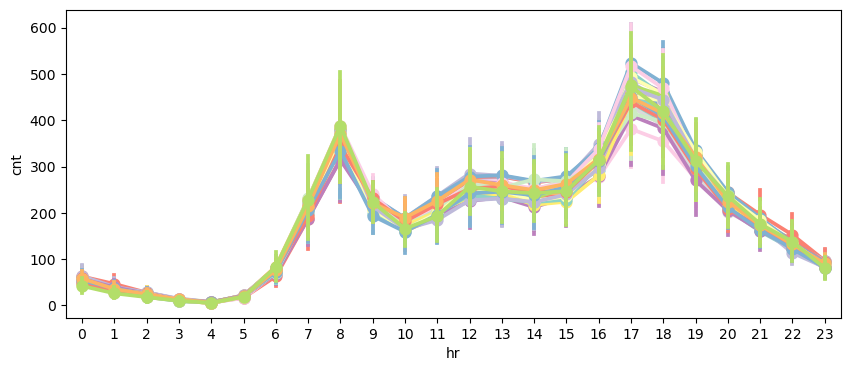

In [187]:
plt.figure(figsize = (10,4))
g = sns.pointplot(x = 'hr', y = 'cnt', data = hour, estimator=np.average, hue = 'day', palette='Set3')
g.legend_.remove()

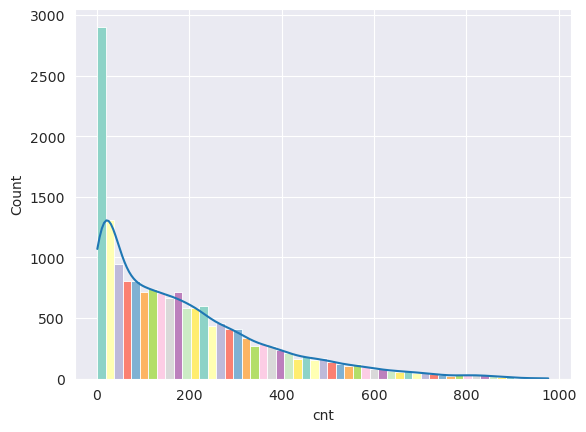

In [192]:
plot = sns.histplot(hour['cnt'], kde=True )
for bin_,i in zip(plot.patches,sns.color_palette("Set3",50)):
    bin_.set_facecolor(i)

In [193]:
print("Untransformed Skew:", hour["cnt"].skew())
print("Log transformed Skew:",np.log(hour["cnt"].skew()))
print("Sqrt transformed Skew:",np.sqrt(hour["cnt"].skew()))
print("Boxcox transformed Skew:",pd.Series(boxcox(hour['cnt'], 0.4)).skew())

Untransformed Skew: 1.277226070152214
Log transformed Skew: 0.24469059360774312
Sqrt transformed Skew: 1.1301442696188013
Boxcox transformed Skew: 0.06778816648657665


روش باکس کمترین چولگی رو برای این ستون خواهد داشت

In [277]:
def assign_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3

hour["time_label"] = hour["hr"].apply(assign_label)

این روش لیبل زدن توی راهنما ی سوال بود منم زدم دیدم بهتر میشه جواب

In [278]:
hour = pd.get_dummies(hour, columns=['yr','season','mnth',"weekday","weathersit","hr",'time_label'],
                      drop_first=False)

In [279]:
hour.drop(['dteday', 'casual', 'registered','instant','atemp'], axis=1, inplace=True)

In [258]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

from sklearn.linear_model import LinearRegression, Ridge, ElasticNetCV,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from scipy.special import boxcox
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error,make_scorer
from sklearn import preprocessing
from sklearn import metrics
import math

In [282]:
X = hour.drop('cnt',axis=1)
y = hour["cnt"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [305]:
# y_train = boxcox(y_train, 0.4)
# y_test = boxcox(y_test, 0.4)
# X_train = boxcox(X_train, 0.4)
# X_test = boxcox(X_test, 0.4)

In [283]:
y_train = np.log(y_train)
y_test = np.log(y_test)

تو قسمت های بالا وقتی روش باکس رو زدم چولگی کمتر شد
ولی اینجا همون روش باکس رو مدل میزدم عدد های مدل بد میشد
حالا یا من اشتباه میزدم
یا واقعا خوب جواب نمیداد
برای همین لگاریتم زدم

In [284]:
clf = make_pipeline(PCA(random_state=42), LinearRegression())
param_grid = {"pca__n_components": np.arange(10, 30)}
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29])})

In [285]:
grid_search.best_params_

{'pca__n_components': 29}

In [286]:
Y_pred = grid_search.predict(X_test) 


mean_squared_error(y_test,Y_pred)

0.5630502413126413

نمیدونم اشتباهم چیه که با گرید سرچ اوضاع خوب نمیشه برای همین بیخیالش میشم میرم خودم انجام میدم

In [287]:
standard_scaler = preprocessing.StandardScaler()
standard_scaler.fit(X_train, y_train)
X_train_scaled = standard_scaler.transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

In [291]:
models = [LinearRegression(),Ridge(),DecisionTreeRegressor(), RandomForestRegressor(),ExtraTreesRegressor(),
         GradientBoostingRegressor(),KNeighborsRegressor()]

In [303]:
def re(models):
    for i in models:   
        md = i
        md.fit(X_train_scaled, y_train)
        y_predict_md= md.predict(X_test_scaled)
        print("*****************",i,"*****************")
        print("MSE : ", metrics.mean_squared_error(y_test, y_predict_md))
        print("R2_SCORE : ", metrics.r2_score(y_test, y_predict_md))
        print("MAPE : ", metrics.mean_absolute_error(y_test, y_predict_md,multioutput='uniform_average'))
        print("\n")

In [304]:
re(models)

***************** LinearRegression() *****************
MSE :  0.39750732185845855
R2_SCORE :  0.8162356091034024
MAPE :  0.4651044761274941


***************** Ridge() *****************
MSE :  0.3970233005070213
R2_SCORE :  0.816459368224145
MAPE :  0.46470043071023515


***************** DecisionTreeRegressor() *****************
MSE :  0.22951351653822727
R2_SCORE :  0.8938977743303018
MAPE :  0.3058408743322122


***************** RandomForestRegressor() *****************
MSE :  0.12449418983857624
R2_SCORE :  0.9424473520163298
MAPE :  0.22746785445838433


***************** ExtraTreesRegressor() *****************
MSE :  0.1397269963026048
R2_SCORE :  0.935405349900694
MAPE :  0.23370236133796685


***************** GradientBoostingRegressor() *****************
MSE :  0.238124657258566
R2_SCORE :  0.8899169142495373
MAPE :  0.3595520552531819


***************** KNeighborsRegressor() *****************
MSE :  0.21692881677335646
R2_SCORE :  0.8997155783297248
MAPE :  0.33436869990210

In [ ]:
MSE:
    هر چه به صفر نزدیک تر باشد بهتر است 
    در اینجا با توجه به اینکه سوال این مهیار را خواسته کوچکترین مورد نظر است 
    میشه مدل 
    RandomForestRegressor

In [ ]:
MAPE:
    معیار خطا هست و وقتی عددی بین ۲۰ تا ۵۰ باشد منطقی است که همه این مدل ها اوکی هستند

In [ ]:
R2_SCORE:
    ارزیابی عملکرد مدل هست که وقتی عددی بین ۰٫۷۵ تا ۱ هست خوب هست که همه این مدل ها اوکی هستند